# Mandelbrot Set
  
Author: Christoph Guettner

**Abstract:** 'The Mandelbrot set is the set obtained  
from the recurrence relation, $Z_{n} = Z²_{n-1} + c$,  
where, $Z_{0} = c$. where c is a complex number.' - Wolfram
  

  


In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
def get_Mandelbrot(c:complex, thresh:int =4, max_steps:int =25) -> int:
    z=c
    i=1
    while i  <  max_steps   and   (z*z.conjugate()).real  <  thresh:
        z=z*z +c
        i+=1
    return i


def get_image(n, area, thresh, max_steps=25):
    xmin = area[0]
    xmax = area[1]
    ymin = area[2]
    ymax = area[3]

    mx = (xmax - xmin) / (n-1)
    my = (ymax - ymin) / (n-1)

    mapper = lambda x,y: (mx*x + xmin, my*y + ymin)
    img=np.full((n,n), 255)
    for x in range(n):
        for y in range(n):
            it = get_Mandelbrot(complex(*mapper(x,y)))
            img[y][x] = 255 - it
    return img

def zoom(n, x0, y0, area_old):
    xmin = area_old[0]
    xmax = area_old[1]
    ymin = area_old[2]
    ymax = area_old[3]

    delX = xmax - xmin
    delY = ymax - ymin

    mx = delX / (n-1)
    my = delY / (n-1)

    xcenter = mx*x0 + xmin
    ycenter = my*y0 + ymin

    xmin = xcenter - (delX / 20.0)
    xmax = xcenter + (delX / 20.0)
    ymin = ycenter - (delY / 20.0)
    ymax = ycenter + (delY / 20.0)

    area = [xmin, xmax, ymin, ymax]

    return area


    

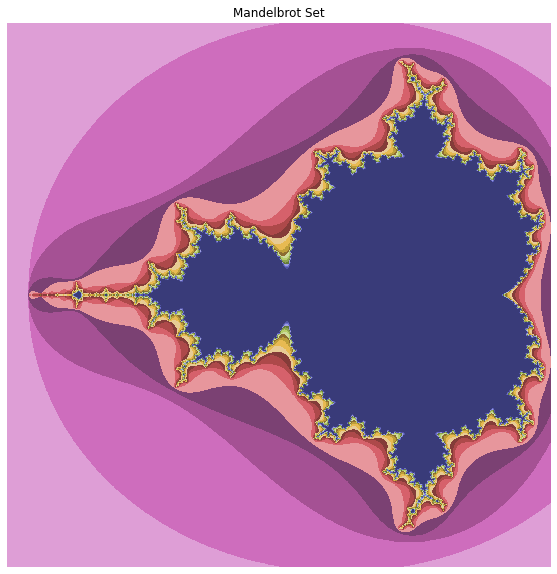

In [36]:
n=1000 
x0 = np.float64(-0.8)
xdelta = np.float64(1.3)
y0 = np.float64(-0.0)
ydelta = np.float64(1.3)

xmin = x0 - xdelta
xmax = x0 + xdelta
ymin = y0 - ydelta
ymax = y0 + ydelta

# area = [-2.0, 0.47, -1.12, 1.12]  # original
area0 = [xmin, xmax, ymin, ymax] 
cmaps=['tab20c', 'prism', 'flag', 'tab20', 'rainbow', 'hsv']



mandelbrot = get_image(n,area0, thresh=4, max_steps=50) 
plt.figure(figsize=(20,10))
plt.imshow(mandelbrot, cmap='tab20b')
plt.title('Mandelbrot Set')
plt.axis("off")
plt.show() 

## Multiplot with different color maps

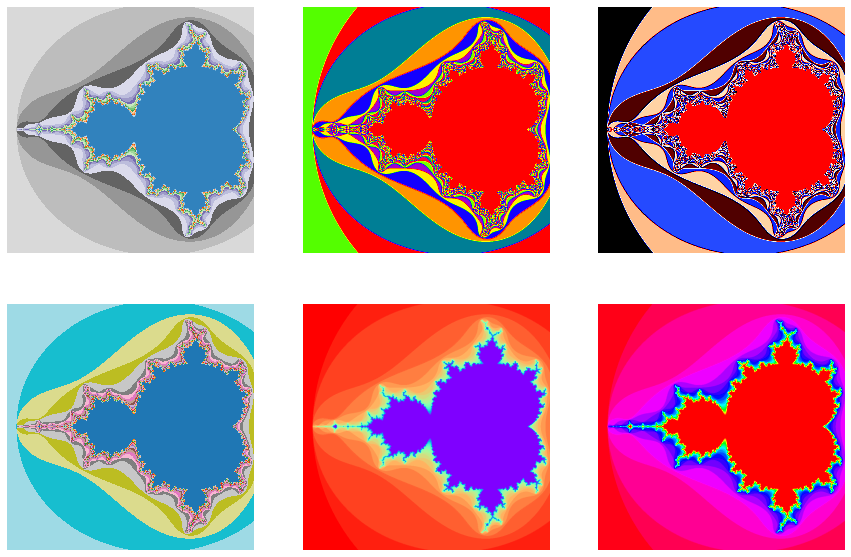

In [33]:

fig, axes = plt.subplots(2,3, figsize=(15,10))
for i, ax in enumerate(axes.flatten()):
    mandelbrot = get_image(n, area0, thresh=4, max_steps=50)
    ax.imshow(mandelbrot, cmap=cmaps[i])
    ax.axis("off")
plt.show()

## Zoom Function

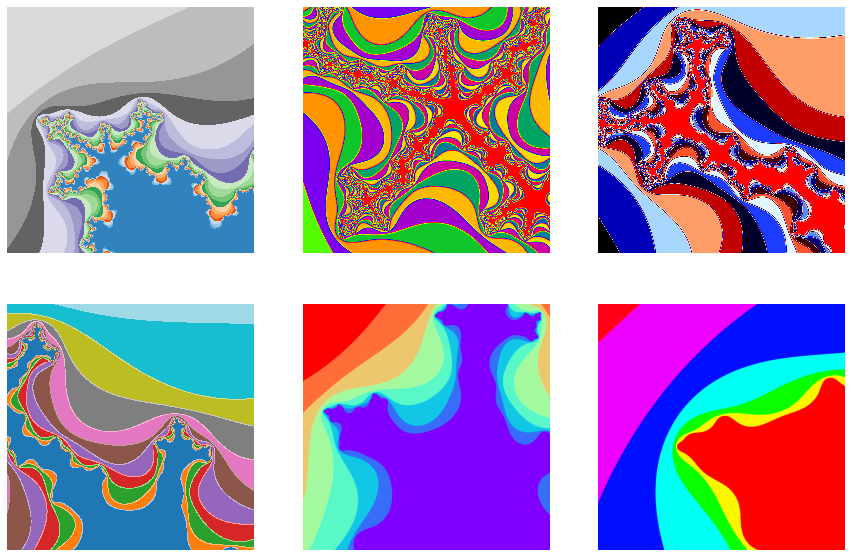

In [34]:

area1 = zoom(n, 600, 240, area0)
area2 = zoom(n, 200, 500, area1)
area3 = zoom(n, 200, 700, area2)
area4 = zoom(n, 400, 100, area3)
area5 = zoom(n, 100, 150, area4)
area6 = zoom(n, 100, 430, area5)

areas = [area1,area2,area3,area4,area5,area6]
fig, axes = plt.subplots(2,3, figsize=(15,10))
for i, ax in enumerate(axes.flatten()):
    mandelbrot = get_image(n, areas[i], thresh=4, max_steps=50)
    ax.imshow(mandelbrot, cmap=cmaps[i])
    ax.axis("off")
plt.show()